# Heart Attack: Who is at risk?

#### Introduction:

Heart attacks are one of the main causes of death in the world. Back in 2019, approximately **18 million** people died from Cardiovascular diseases, representing **32%** of global deaths for that year. Heart attacks and strokes represent over **85%** of those deaths. But what is a heart attack? During its occurrence, a lack of blood flow causes the tissue in the heart muscle to die. It occurs when the flow of blood to the heart is severely reduced or blocked. In other words, it is sudden, unexpected and usually fatal. The goal of this project is to predict if a person is at risk of having a heart attack.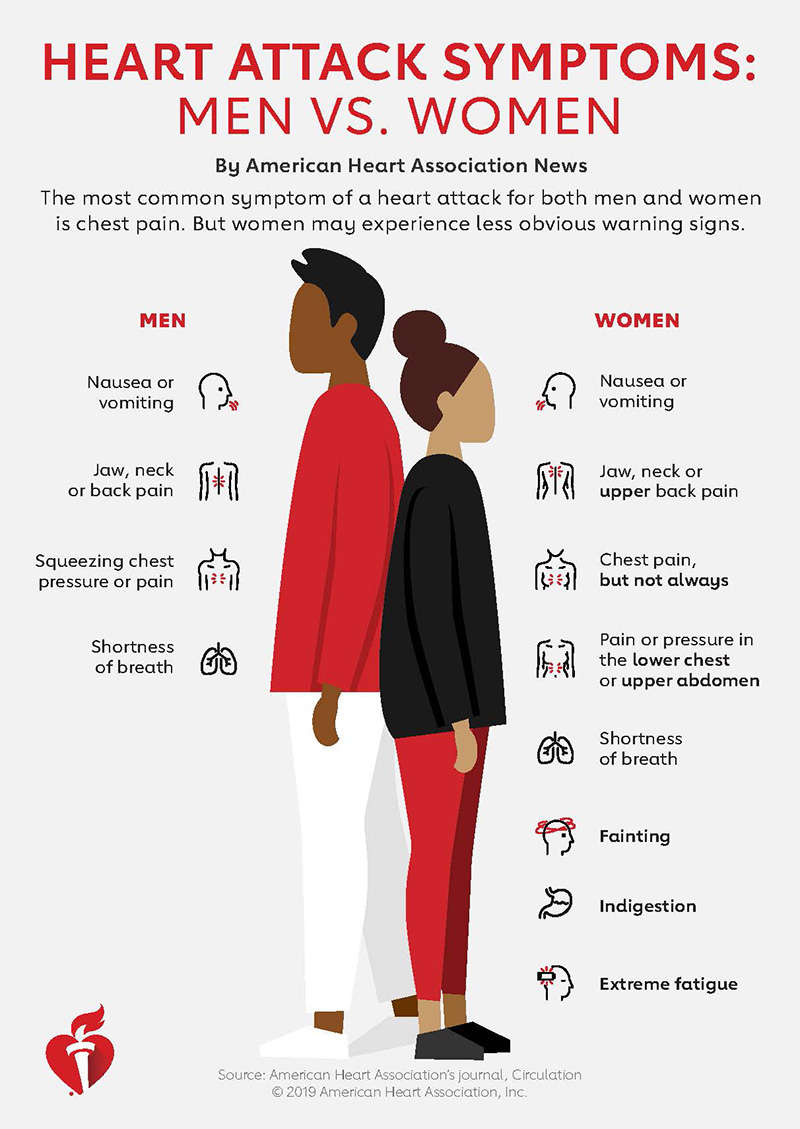

#### Our data:

The data we are working on today was taken from Kaggle. Click the following to access it [OUR DATA](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

In [2]:
#import all the necessary packages (this will be updated every step along the way)

import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc,classification_report, confusion_matrix,accuracy_score

from sklearn.model_selection import StratifiedKFold


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
import xgboost as xgb


### Loading our data

Our data is a CSV file 

In [3]:
data = pd.read_csv("/Users/raouz/Desktop/Capstone Project: Heart Attack Prediction/data/raw/heart.csv")

### Data wrangling

Now that our data is in our notebook, it's time to learn about it and clean it up.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Saving the columns names just in case we need them in the future
original_columns = data.columns
print(original_columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [7]:
data.shape

(303, 14)

Based on our data documentation we have the following:


1-age - age in years

2-sex - sex (1 = male; 0 = female)

3-cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4-trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5-chol - serum cholestoral in mg/dl

6-fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7-restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8-thalach - maximum heart rate achieved

9-exng - exercise induced angina (1 = yes; 0 = no)

10-oldpeak - ST depression induced by exercise relative to rest

11-slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12-ca - number of major vessels (0-3) colored by flourosopy

13-thal - Thalium Stress Test result 2 = normal; 1 = fixed defect; 3 = reversable defect

14-num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

##### Let's rename our columns to make it more readable and easier to understand

In [8]:
data.rename(columns ={'age':'Age','sex':'Sex',"caa":"MajorVessels",'trtbps':'RestBloodP','cp':'ChestPain','thalachh':'MaxHeartRate','restecg':'RestEcg'}, inplace =True)


Before we move forward, let's generate a full report of the data with more details now that our features make more sense.

In [9]:
#from pandas_profiling import ProfileReport

#Report = ProfileReport(data,title="Our Data in Depth")
#Report

From the report we can clearly see that our data contains both numerical and categorical values. We also notice that there is only on duplicated row. A lot more information was provided in the report whether about our features and their relationships with each other. We will look closely at all these details about our data in what follows, starting by learning more about which features are numerical and which ones are categorical.

In [10]:
#Print out what are these unique values for each column
for col in data.columns:
    print(col)
    print(data[col].value_counts())

Age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: Age, dtype: int64
Sex
1    207
0     96
Name: Sex, dtype: int64
ChestPain
0    143
2     87
1     50
3     23
Name: ChestPain, dtype: int64
RestBloodP
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1


Therefore we can conclude that our numeric features are: Age, RestBloodP, chol, thalach, oldpeak and the rest are all categorial including our target!

While looking at our MajorVessels column, we noticed that the number 4 appears, even though it is not part of the allowed values, which vary from 0 to 3. This is definitely a value that refers to a missing value. Only 5 rows have a value 4 for MajorVessels, and since our dataset is not large, we can replace rather than delete these values.


In [11]:
data['MajorVessels'].unique()

array([0, 2, 1, 3, 4])

In [12]:
mode= data['MajorVessels'].mode().iloc[0]
type(mode)

numpy.int64

In [13]:
#replace all 4 with the mode, most frequent value.

data['MajorVessels'] = data['MajorVessels'].replace(4,mode)#0 in this case



In [14]:
data['MajorVessels'].unique()

array([0, 2, 1, 3])

In [15]:
data['MajorVessels'].value_counts()

0    180
1     65
2     38
3     20
Name: MajorVessels, dtype: int64

Same thing goes for the "thall" feature. The value 0 is actually a NaN value based on the documentation. Therefore we will replace it by 2, the most fequent value among the patients.

In [16]:
data['thall'].unique()

array([1, 2, 3, 0])

In [17]:
mode2= data['thall'].mode().iloc[0]
data['thall'] =data['thall'].replace(0,mode2)#0 in this case

In [18]:
data['thall'].unique()

array([1, 2, 3])

In [19]:
data['thall'].value_counts()

2    168
3    117
1     18
Name: thall, dtype: int64



Good! Now let's drop any duplicate rows, it there is any. The reason for that is that the chances of 2 people having the same exact data is rare, however, a data entry error is more common. Therefore, deleting these duplicate rows will help us build a more precise and unbiased model.


In [20]:
#Lets get the shape before
data.shape

(303, 14)

In [21]:
#Find out if there is any duplicate rows, if it returns True that means there are some
True in data.duplicated()

True

In [22]:
#Lets delete these rows and update our data
data = data.drop_duplicates()
data.shape

(302, 14)

#Only one row was a duplicate and now its gone.

### EDA (Exploratoty Data Analysis)

Let's look at our data again and split it into numeric and categorical subsets. 

In [23]:
data.head()

,Age,Sex,ChestPain,RestBloodP,chol,fbs,RestEcg,MaxHeartRate,exng,oldpeak,slp,MajorVessels,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
#Numerical Features 
Num_vals= data[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak']]

Num_vals.head()

,Age,RestBloodP,chol,MaxHeartRate,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [25]:
#Categorical Features
Cat_vals= data[['Sex','ChestPain','fbs','RestEcg','exng','slp','MajorVessels','thall','output']]

Cat_vals.head()

,Sex,ChestPain,fbs,RestEcg,exng,slp,MajorVessels,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


## Numerical Features
Let's explore our numerical features one by one then explore their connection with our dependent variable, 'Output'

In [26]:
Num_vals.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
RestBloodP,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
MaxHeartRate,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In the following graphs we will display the distributions of the numerical features. This 

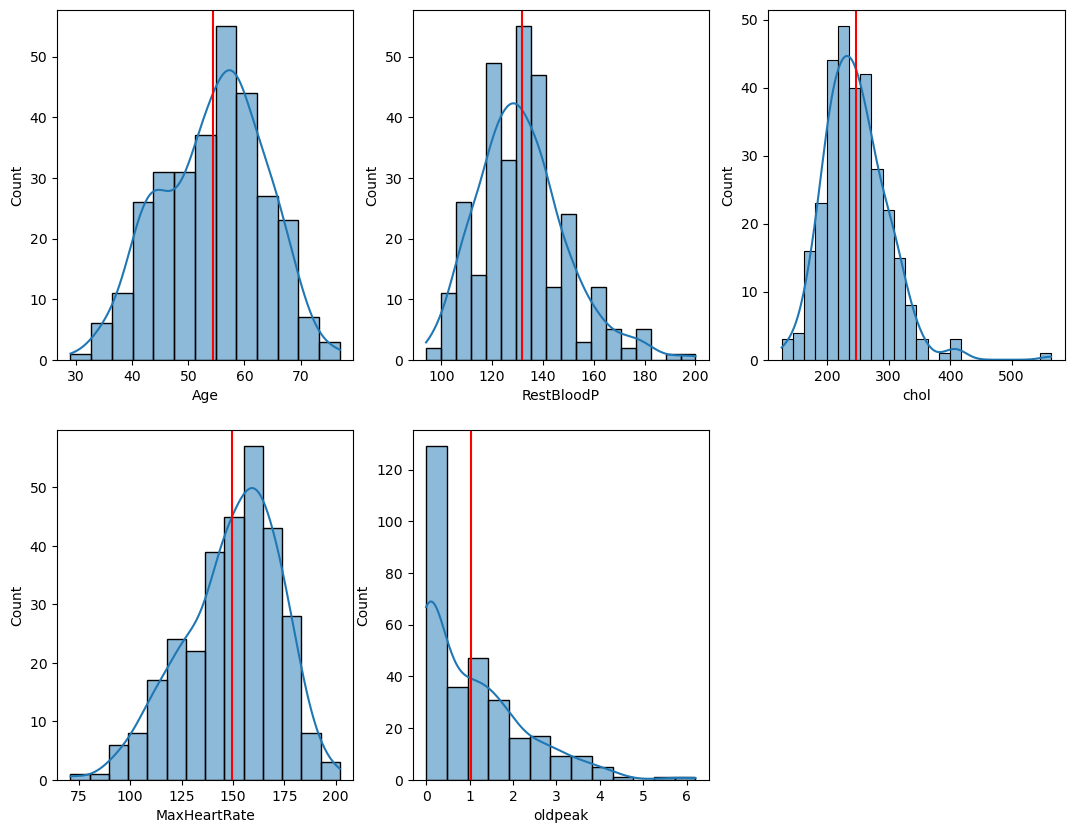

In [27]:
Num_vals= data[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak']]
plt.figure(figsize = (13,10))

for row,col in enumerate(Num_vals):
    plt.subplot(2,3,row+1)
    sns.histplot(data[col],kde=True,stat='count')
    plt.axvline(x=data[col].mean(),color='red')
    
plt.show()

Our observations:

Age:
 
- The vast majority of patients are between 50 and 60.
- The mean seems to be close to the middle of the data, and it seems that there isn't any outliers. This indicate that our age variable might have a normal distribution.

Resting Blood Pressure:

- There is high density of patients between 115-120, 125-130, and 155-160 values.Therefore,the resting blood pressure of most patients is between 110 and 140.
- There is a small skew to the right, however, this data could be normally distributed,
- Values after 180 can be considered as outliers.
 
Chol:

- Cholesterol value in most patients is between 200-and 280. 
- Our distribution is slightly skewed to the right due to values that outlier, which if removed, would make our data normally distributed.
- Values after 380 can be considered as outliers.

Max Heart Rate:

- The maximum heart rate in most patients is between 145-and 170.
- Our data seems to be normally distributed, but there is a small left skew.
- The values before 80 can be considered outliers.

Old peak:
 
- Most of the value are between 0 and 1.5. Therefore, our data is clearly skewed to the right.
- The values after 2.5 can be considered outliers.

#### Target variable: Output
Seeing our numerical values in connection with our target feature will give us a better idea of how our features are distributed. Before that let's look at how our target feature 'output' is split. 



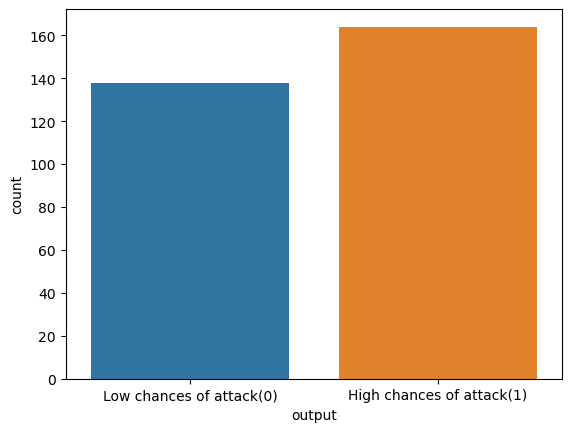

In [28]:
x=sns.countplot(x=data['output'])
x.set(xticklabels = (["Low chances of attack(0)","High chances of attack(1)"]))
plt.show()

Our data contains slightly more patients at risk than patients with low chances of having a heart attack. Now let's see how our target affects the numerical values distribution.
For that we will use **KDE PLOTS**.


--> These graphs will consist of 2 humps in different colors, each representing a different output value. The rule here is if the humps are separated and not overlapping, then there is a chance of correlation with the Target. If the humps overlap a lot, that means the feature is not well-correlated with the Target because the Target is equally as common on those values of the feature.

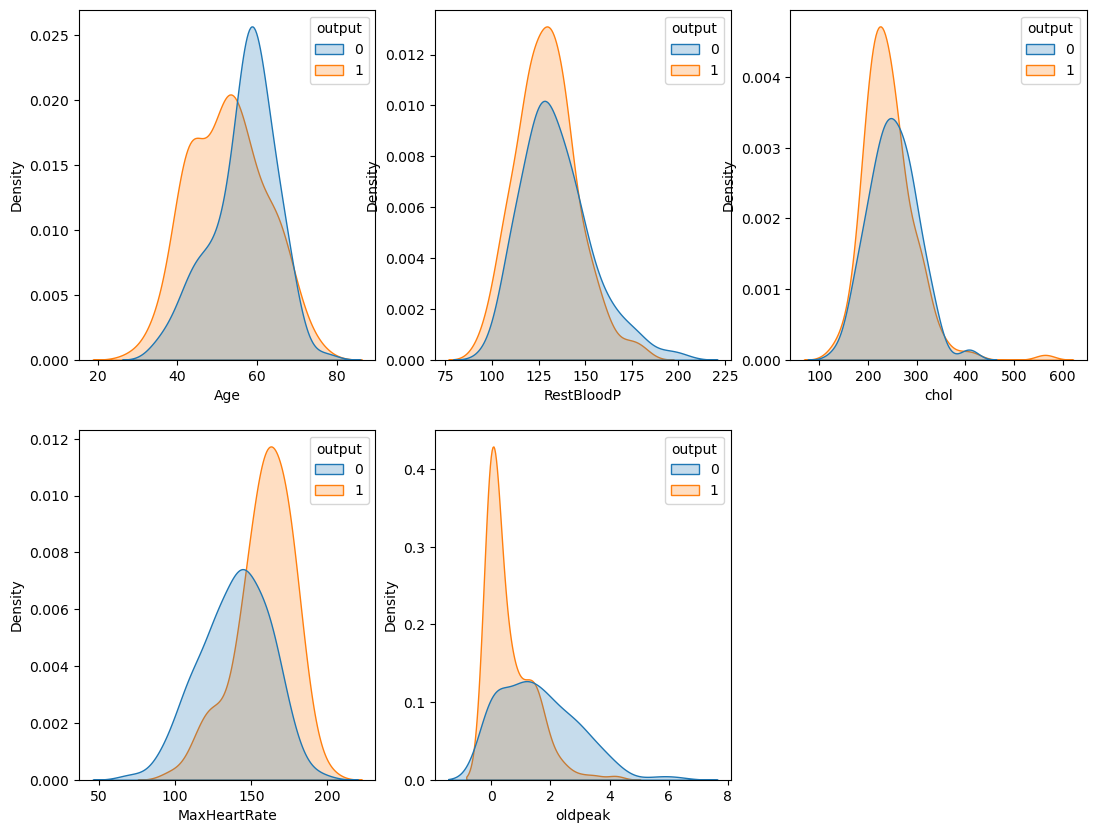

In [29]:
plt.figure(figsize = (13,10))
for row,col in enumerate(Num_vals):
    plt.subplot(2,3,row+1)
    sns.kdeplot(data=data,x=col,hue='output',fill=True)
    


Before we analyse these graphs, lets construct a correlation table for these values vs our target.

In [30]:
num_targ_corr= data[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak','output']]
num_targ_corr.corr().iloc[:, [-1]]

,output
Age,-0.221476
RestBloodP,-0.146269
chol,-0.081437
MaxHeartRate,0.419955
oldpeak,-0.429146
output,1.000000


Our observations:
- We tend to believe as we get older we have a higher chance of having a heart attack. However, this graph shows the contrary. We notice how after 55 the is an increase in the blue graph, which refers to an increase in patients with low risk. The correlation with this variable is negative and little.
- The higher the max heart reach, the higher the chances of having a heart attack. There is some correlation there based on the graph and also the value 0.4199, which shows a moderate correlation between the target and this feature.
- For the old peak, we can see that the patients with values between 0 and 1.5 have a higher chance of a heart attack. On top of that, the graph is somewhat separated, which indicates a correlation. The correlation value of -0.429 indicates a negative and moderate correlation.
- For cholesterol and resting blood pressure, it is clear that the graphs are overlapping throughout the distribution. Also, their correlation coefficient is low, therefore for now we assume they have such a little correlation with our target value 




Finally, let's look at the outliers discusses before and where exactly they appear.

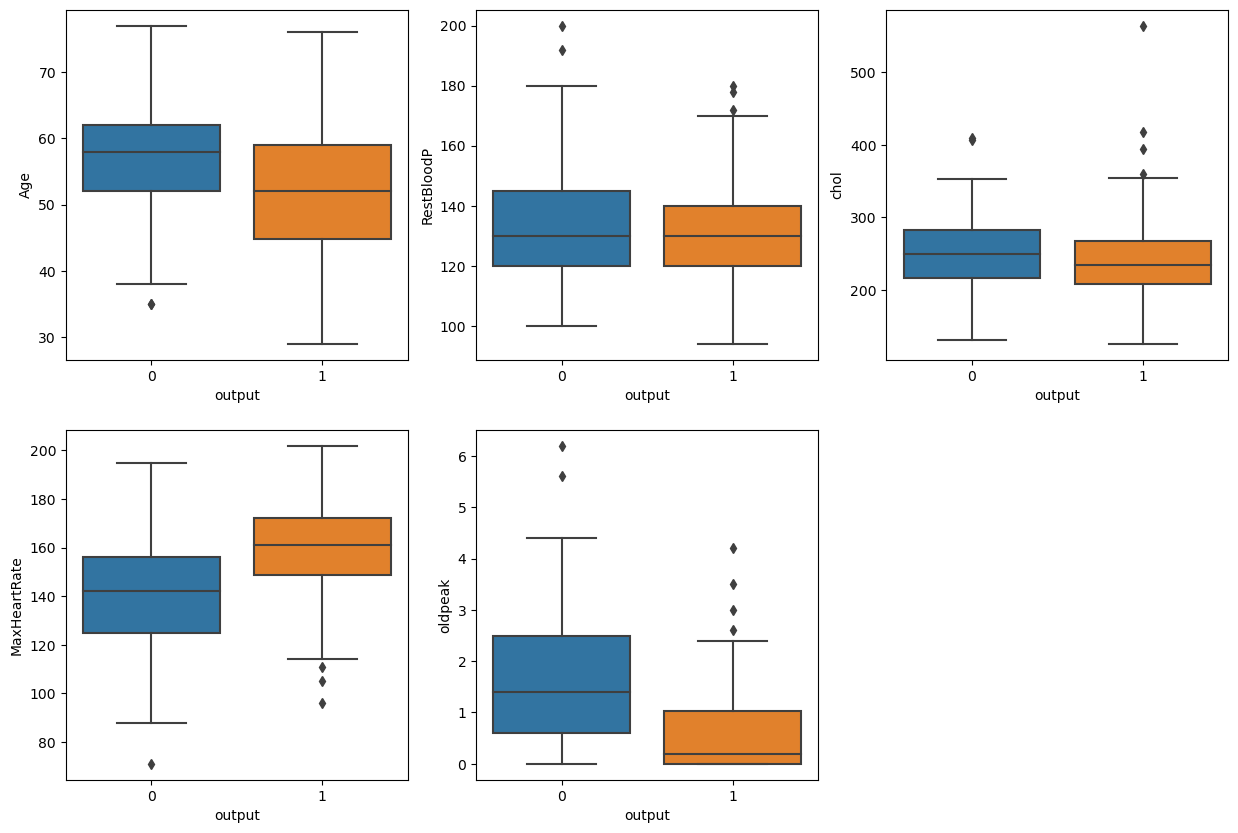

In [31]:
Num_vals= data[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak']]
plt.figure(figsize = (15,10))

for row,col in enumerate(Num_vals):
    plt.subplot(2,3,row+1)
    #sns.violinplot(data=Num_vals,y=Num_vals[col],x=data['output'])
    sns.boxplot(data=Num_vals,y=Num_vals[col],x=data['output'])



We clearly see the presence of multiple outliers in our data. We will take care of this in the preprocessing phase of this notebook. This data set is small so dropping these outliers will lower the strength of our model.

## Categorical Features

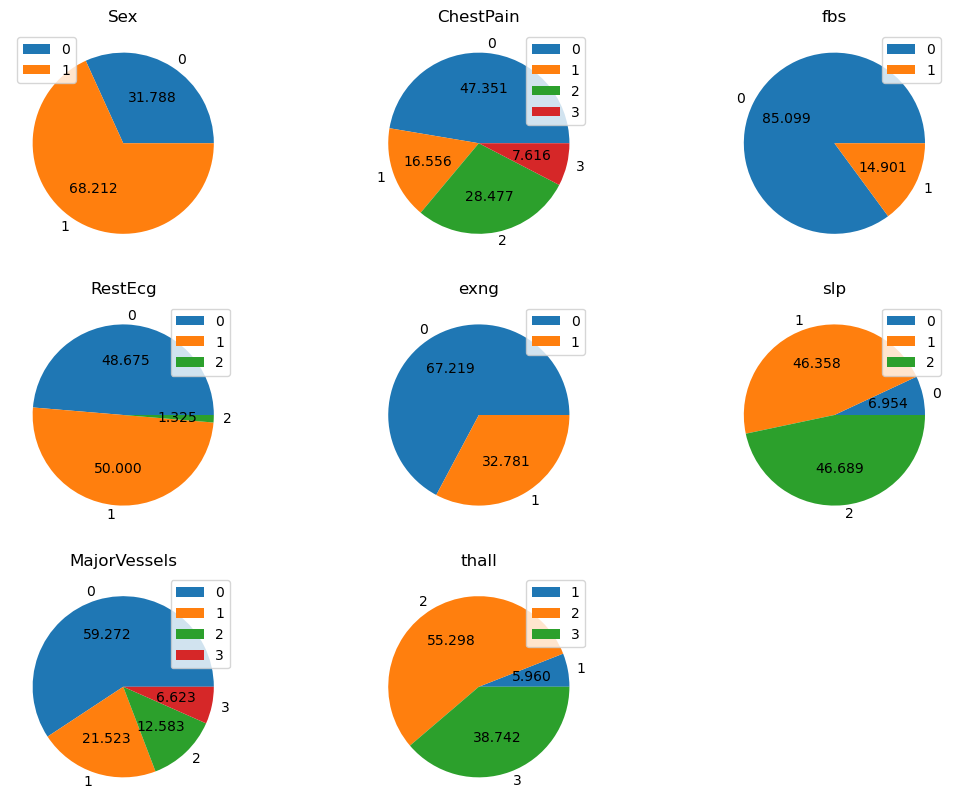

In [32]:
#We already discussed the target variable so for now we will remove it from our Categorical dataframe.
Cat_vals= data[['Sex','ChestPain','fbs','RestEcg','exng','slp','MajorVessels','thall']]
plt.figure(figsize=(13,10))

for row,col in enumerate(Cat_vals):
    plt.subplot(3,3,row+1)
    data.groupby(col).size().plot(kind='pie', autopct='%.3f',label='')
    plt.title(col)
    plt.legend()

**Our observations:**
The pie charts above show us how our data varies when it comes to the categorical features. These features might be really critical to our target so we will visualize how the output varies for each of the categories of these features. For that we will build multiple count plots in the form of bars. Blue represents the value 0, which reflects the patients with low chances, while the orange is for patients at risk of a heart attack.

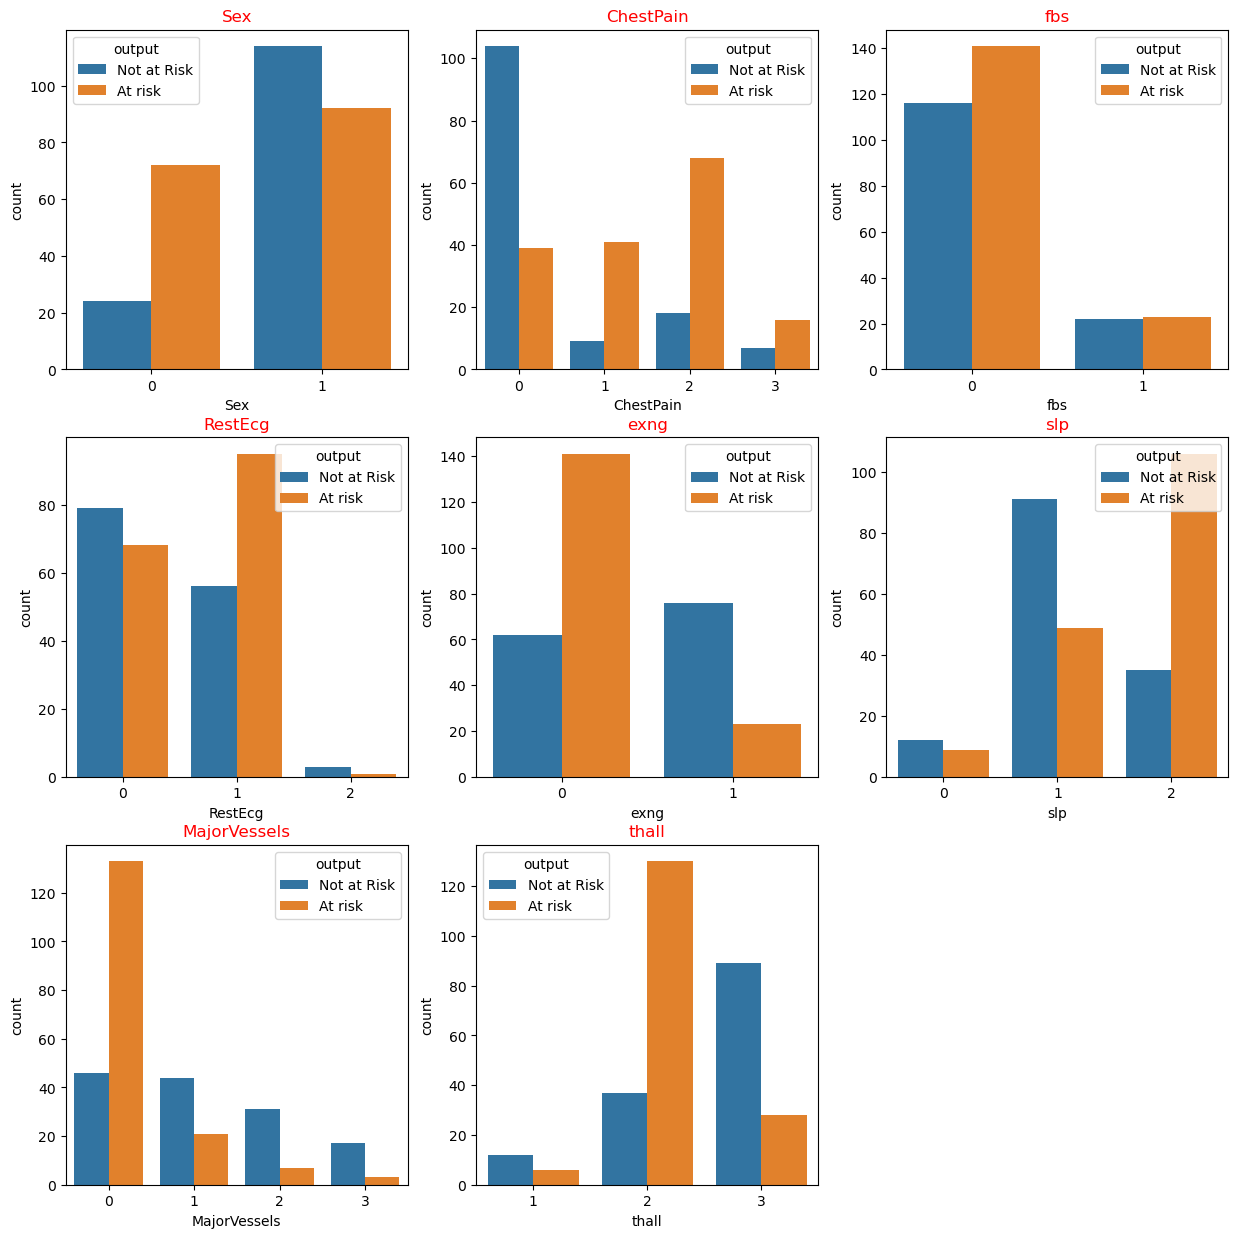

In [33]:
plt.figure(figsize=(15,15))
for row,col in enumerate(Cat_vals):
    plt.subplot(3,3,row+1)
    sns.countplot(data=data,x=col, hue='output')
    plt.title(col,color='red')
    plt.legend(title='output', labels=['Not at Risk', 'At risk'])

In [34]:
#Lets build a corr table for the categorical features:
Cat_target_corr= data[['Sex','ChestPain','fbs','RestEcg','exng','slp','MajorVessels','thall','output']]
Cat_target_corr.corr().iloc[:, [-1]]

,output
Sex,-0.283609
ChestPain,0.432080
fbs,-0.026826
RestEcg,0.134874
exng,-0.435601
slp,0.343940
MajorVessels,-0.463886
thall,-0.362313
output,1.000000


**Our observations:**

- Sex:
 - Women (value 0) are at higher risk for a heart attack than men. Our females patients at risk is more than double the amount at low risk. While men are the opposite, there are more men at low risk than high risk. With a value of -0.283 we can say that this feature is in a negative low correlation with the target.
 
- Chest Pain:
 - Having a value of 0 was not only the most common among our patients, but it is the one where the patients at low risk almost triple the ones at risk. While patients with other values (1,2,3) are more likely to be at risk of a heart attack as shows on the graph; the Orange bars are overpowering the blue ones. With a value of 0.432080 we can say that this feature is in a positive moderate to strong correlation with the target.

- FBS:
 - The majority of our patients had value 0, in other words, they had a fasting blood sugar less than 120 ml/dl. The risk of a heart attack is slightly higher for these people, while the patients with value 1 are still at risk, but their data is so small that we can't make a clear assumption about them. This also shows that the output doesn't make a difference in the two categories. With a value of -0.026826 we can say that this feature is in a negative very low correlation with the target.
 
- RestEcg:
 - Resting electrocardiographic results show that patients with a value of 1 are extremely at risk, as their amount doubles the patients not at risk. For values 0 and 2, those patients are more likley to be at low risk. With a value of 0.134874 we can say that this feature is in a positive low to moderate correlation with the target 

- Exng:
 - Exercise induced angina with value 0, which means abscence of pain are more likely to be at risk of a heart attack. This is surprising because it means that excersive related heart pain has nothing to do with the chances of having a heart attack. The bars for value 1, who are people with pain, have almost 4 times more chances of not having a heart attack than being at risk. With a value of -0.435601 we can say that this feature is in a negative moderate to high correlation with the target.

- Slope:
 - Patients with a slope value of 2 are in general at risk of having a heart attack. As the graph shows, the patients at risk is almost 3 times the number of patients not at risk. As for the other values 0 and 1, the patients are more likely not to be at risk, esepcially with a value of 1, their chances double. With a value of 0.343940 we can say that this feature is in a positive moderate to high correlation with the target.
 
- Major Vessels
 - The value 0 is what draws our attention in this feature. We can see that patients with 0 major vessels are 3 times more likely to be at risk than not to be. Patients with 1,2 or 3 majors vessels are clearly at less risk. This is also the feature with the highest correlation coefficent in our categorical features. With a value of -0.463886 we can say that this feature is in a negative moderate to high correlation with the target. 

- Thall:
 - For Thalium stress test results, patients with value 1 have almost 4 times more chances of being at risk rather than not. While patients with 0 or 2 are more likely to be at low risk. With a value of -0.362313 we can say that this feature is in a negative moderate correlation with the target. 

### Putting everything together:
After separating our into 2 subests, that consisted of Numerical Features and Categorical Features, we proceeded to analyse these numbers and their variability. We then proceeded to analyze these features when they come in touch with our target variable, 'output'. Many features stood out from the rest by having not only a higher correlation coefficent but also by being distributed differently depending on the output results. In order for us to have a more general idea of the correlation of our features and the target, we will now check the correlation between all our features.

<AxesSubplot:>

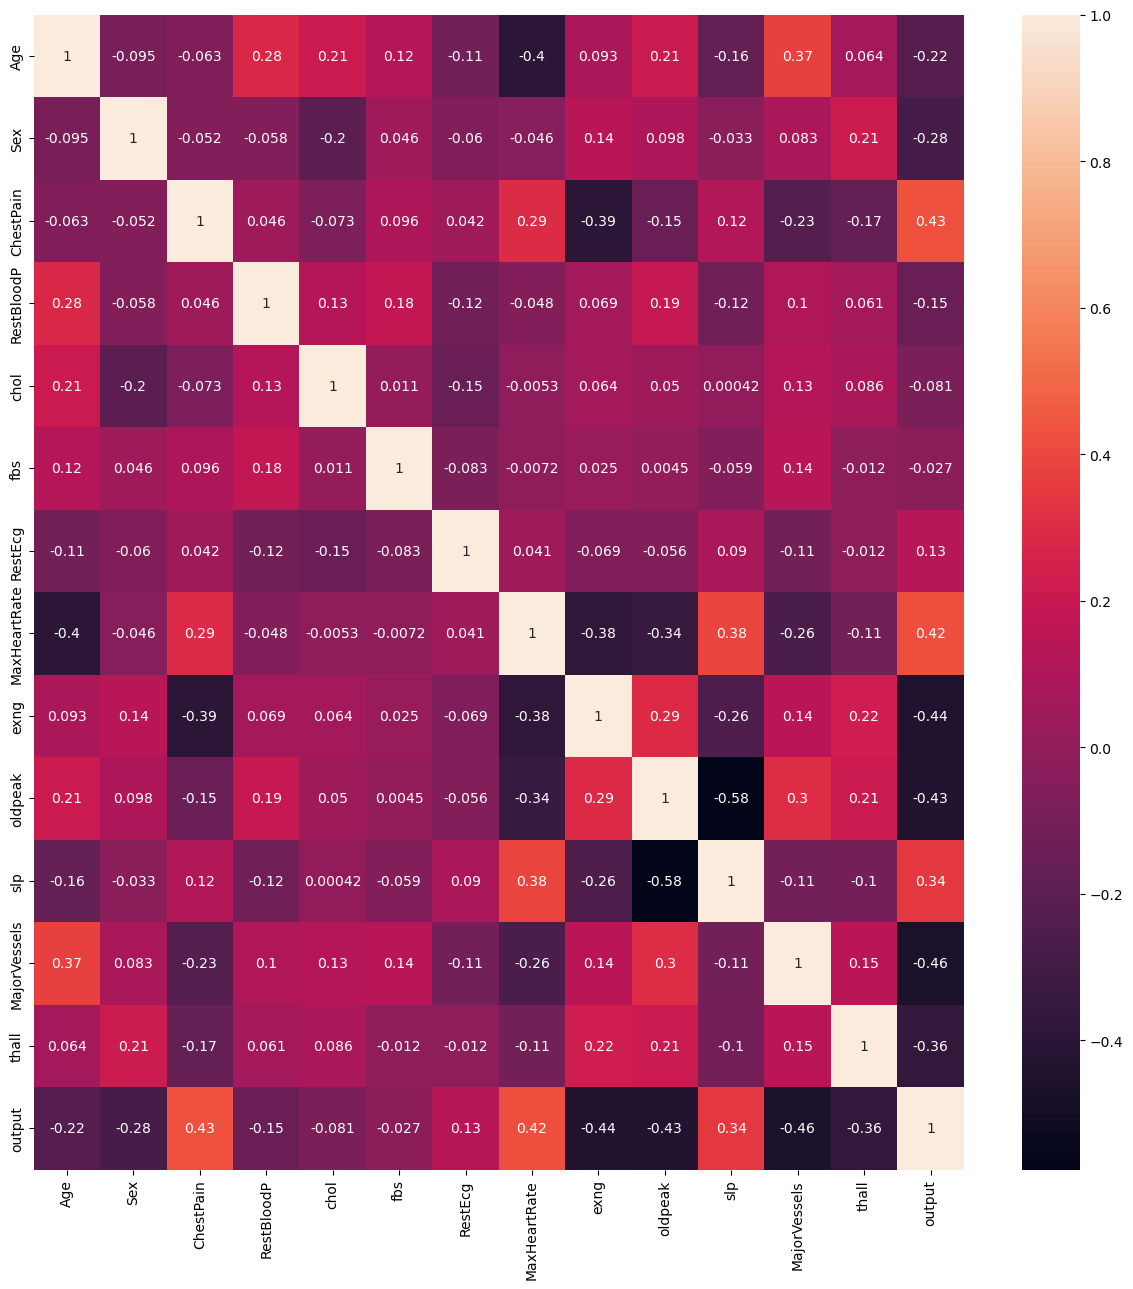

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

In conclusion, this EDA phase taught us a lot about our data and what we should expect in the modeling phase. The features to keep in mind and consider as influencial are the ones with the highest correlation to our target. And based on the heat map above and our individual analysis of each feature in regards to the target, we should look closely at MajorVessels, slp, exng, oldpeak, Chestpain, MaxHeartRate and Thall. 

In [36]:
data.head()

,Age,Sex,ChestPain,RestBloodP,chol,fbs,RestEcg,MaxHeartRate,exng,oldpeak,slp,MajorVessels,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Before we move on, let's rearange our columns to visually separate numerical and categorical features and putting the target variable at the end.


In [37]:
new_cols_order = ['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak','Sex','ChestPain','fbs','RestEcg','exng','slp','MajorVessels','thall','output']
data = data[new_cols_order]
data.head()

,Age,RestBloodP,chol,MaxHeartRate,oldpeak,Sex,ChestPain,fbs,RestEcg,exng,slp,MajorVessels,thall,output
0,63,145,233,150,2.3,1,3,1,0,0,0,0,1,1
1,37,130,250,187,3.5,1,2,0,1,0,0,0,2,1
2,41,130,204,172,1.4,0,1,0,0,0,2,0,2,1
3,56,120,236,178,0.8,1,1,0,1,0,2,0,2,1
4,57,120,354,163,0.6,0,0,0,1,1,2,0,2,1


## Pre Processing

### Encoding

It's time to get our data ready for the modeling phase. Our data is constituted of 5 numerical features and 8 categorical ones. Categorical features are mainly 2 kinds: Ordinal and Nominal. 
- Nominal variables are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable.



- Ordinal variables, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.




Our data is only constituted of nominal data. We could argue that the number of vessels could be considered ordinal, but in this case we will not. In order to optimize our model performance, we will encode our categorical variables. However, our features consists or ones that are already 'encoded' since they only have 2 values (1 and 0). These features that we aren't touching are Sex, fbs and exng. All the other categorical will be coded using pandas .getdummies(). **NB: We will have to drop one column per encoded features after the dummy variables are created. This ensures that we avoid what's called 'The curse of Dimensionality'. Also, if all values of the dummy variables for a specific feature are 0, then the last one is automatically a 1, so we don't need to include it. We will set our paramater drop_first to True.**

In [38]:
#Before I touch this data, I will make a copy of it to preserve its form post EDA, just in case we need to reffer to it later.

EDA_data = data

In [39]:
#Let's apply .getdummies to the colomns that need it ONLY:

data = pd.get_dummies(data=data,columns=['ChestPain','RestEcg','slp','MajorVessels','thall'], drop_first=True)

data.head()


,Age,RestBloodP,chol,MaxHeartRate,oldpeak,Sex,fbs,exng,output,ChestPain_1,...,ChestPain_3,RestEcg_1,RestEcg_2,slp_1,slp_2,MajorVessels_1,MajorVessels_2,MajorVessels_3,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,37,130,250,187,3.5,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
3,56,120,236,178,0.8,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4,57,120,354,163,0.6,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0


In [40]:
X = data.drop('output',axis=1)
y = data['output']



In [41]:
#The data without Output
X.head()

,Age,RestBloodP,chol,MaxHeartRate,oldpeak,Sex,fbs,exng,ChestPain_1,ChestPain_2,ChestPain_3,RestEcg_1,RestEcg_2,slp_1,slp_2,MajorVessels_1,MajorVessels_2,MajorVessels_3,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,37,130,250,187,3.5,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,56,120,236,178,0.8,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,57,120,354,163,0.6,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [42]:
X.shape, y.shape

((302, 20), (302,))

<AxesSubplot:>

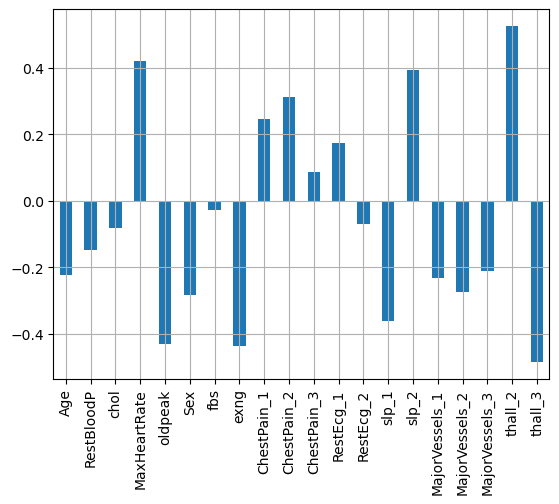

In [43]:
#Corraletion in regards to y (output)

X.corrwith(y).plot.bar(grid=True)

We notice how our target variable is both positvely and negatively correlated with certain features. The top correlated features are the ones to keep an eye on for the upcoming feature selection part. Let's dig deeper in our feature knowledge and how the affect our target variable using **Feature Selection**. But before that, we need to split our data into a training set and test set to avoid any potential data leakage. We will then apply the same transformation of data to both sets, however, we only going to train the model on the training set and test it only with the test set.


### Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
#Stratify makes sure that our split data has the same proportion of our target variable (y)
#Shuffle will shuffle the data before splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True,random_state=24)

Let's learn more about the split and also verify that everything is in order. This is not necessary but it wouldn't hurt to check.

In [45]:
#Lets check if y_train and y_test are really showing the right proportions:
print('Training Set proportions in %:')
print(y_train.value_counts()/len(y_train))

print('Test Set proportions in %:')
print(y_test.value_counts()/len(y_test))

Training Set proportions in %:
1    0.543568
0    0.456432
Name: output, dtype: float64
Test Set proportions in %:
1    0.540984
0    0.459016
Name: output, dtype: float64


### Scaling the data

Simply, Scalling the data means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN. With these algorithms, a change of "1" in any numeric feature is given the same importance.

We will be trying many different models, so to be safe I will scale the data. However, there are many technics and way to scale it that differ from a dataset to another. Before, we have discovered that our data has few outliers, so the best scaler to deal with these outliers, without having to drop them, is Robust Scaler.

- **RobustScaller definition:**

When working with outliers we can use Robust Scaling for scakling our data, It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. RobustScaler uses the interquartile range so that it is robust to outliers



In [46]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
X_train[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak']] = RS.fit_transform(X_train[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak']])
X_train.head()

,Age,RestBloodP,chol,MaxHeartRate,oldpeak,Sex,fbs,exng,ChestPain_1,ChestPain_2,ChestPain_3,RestEcg_1,RestEcg_2,slp_1,slp_2,MajorVessels_1,MajorVessels_2,MajorVessels_3,thall_2,thall_3
15,-0.416667,-0.50,-0.350000,0.181818,0.500,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
61,-0.083333,-1.10,1.150000,0.121212,-0.500,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
58,-1.750000,-0.60,-0.966667,0.666667,-0.500,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
54,0.666667,0.25,0.200000,0.606061,-0.500,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
17,0.916667,1.00,-0.233333,-1.151515,1.125,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [47]:
X_train[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak']].head()

,Age,RestBloodP,chol,MaxHeartRate,oldpeak
15,-0.416667,-0.50,-0.350000,0.181818,0.500
61,-0.083333,-1.10,1.150000,0.121212,-0.500
58,-1.750000,-0.60,-0.966667,0.666667,-0.500
54,0.666667,0.25,0.200000,0.606061,-0.500
17,0.916667,1.00,-0.233333,-1.151515,1.125


TEST SET

In [48]:
#We only transform and not fit the test set to avoid any Data leakge.
X_test[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak']] = RS.transform(X_test[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak']])






In [49]:
X_test[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak']].head()

,Age,RestBloodP,chol,MaxHeartRate,oldpeak
53,-0.916667,-1.10,-1.650000,0.696970,-0.125
2,-1.166667,0.00,-0.600000,0.606061,0.375
286,0.333333,0.20,-0.600000,0.303030,0.000
274,-0.666667,-1.00,0.583333,-1.030303,0.125
30,-1.166667,-1.25,-0.700000,0.484848,-0.500


Looks good! Lets now go back to our features and look how important they are in regards to the output.

### Feature Selection

We will do an initial view of the most influencial features in our dataset. This will allow us to have a better idea of what features we need to pay a little extra attention to. 

#### 1- *Mutual Information*
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

In [50]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00213313, 0.0015754 , 0.029045  , 0.05126974, 0.13856492,
       0.02707869, 0.        , 0.03027166, 0.        , 0.061842  ,
       0.04485114, 0.        , 0.        , 0.10942775, 0.06696631,
       0.05574037, 0.01210993, 0.05255223, 0.16689071, 0.1615313 ])

In [51]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

thall_2           0.166891
thall_3           0.161531
oldpeak           0.138565
slp_1             0.109428
slp_2             0.066966
ChestPain_2       0.061842
MajorVessels_1    0.055740
MajorVessels_3    0.052552
MaxHeartRate      0.051270
ChestPain_3       0.044851
exng              0.030272
chol              0.029045
Sex               0.027079
MajorVessels_2    0.012110
Age               0.002133
RestBloodP        0.001575
RestEcg_2         0.000000
RestEcg_1         0.000000
ChestPain_1       0.000000
fbs               0.000000
dtype: float64

<AxesSubplot:>

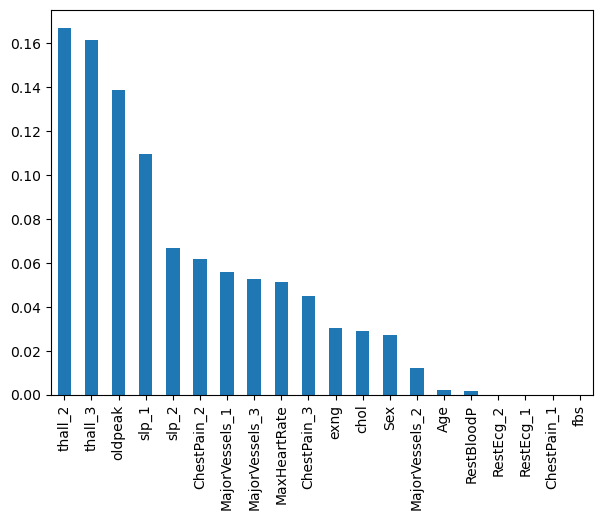

In [52]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(7, 5))

We notice that the Thalium level is a major component of our data in regards to its correlation to the output. Other features like old peak and MaxHeartRate should be important in our modeling aswell.  

# Modeling

### Metrics that we will focus on

In this notebook we will make Recall our main metric. However, we will look at other metrics to get more insight about the strength of each model and how they differ in their predictions for our dataset. Recall, also known as **Sensitivity** focuses on minimizing the False negatives, which in our case are important. We rather predict that person is at risk (1) even if they are actually not, rather than the opposite. 


Other metrics like F1 Score represents the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.


Finally,the probabilistic interpretation of ROC-AUC score is that if you randomly choose a positive case and a negative case, the probability that the positive case outranks the negative case according to the classifier is given by the AUC. You should use it when you care equally about positive and negative classes. It naturally extends the imbalanced data discussion from the last section. If we care about true negatives as much as we care about true positives then it totally makes sense to use ROC AUC.



So to summarize, we will be looking at Recall as our main metric, followed by the ROC-AUC score then finally we will look at F-1 scores for reference and comparasion. 

In [53]:
#Cross validation parametre
scoring = ['recall','roc_auc','f1']

In [54]:
X_test

,Age,RestBloodP,chol,MaxHeartRate,oldpeak,Sex,fbs,exng,ChestPain_1,ChestPain_2,ChestPain_3,RestEcg_1,RestEcg_2,slp_1,slp_2,MajorVessels_1,MajorVessels_2,MajorVessels_3,thall_2,thall_3
53,-0.916667,-1.10,-1.650000,0.696970,-0.1250,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
2,-1.166667,0.00,-0.600000,0.606061,0.3750,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
286,0.333333,0.20,-0.600000,0.303030,0.0000,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0
274,-0.666667,-1.00,0.583333,-1.030303,0.1250,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0
30,-1.166667,-1.25,-0.700000,0.484848,-0.5000,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-0.333333,-1.50,-0.300000,-0.272727,0.2500,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
49,-0.166667,0.40,-0.100000,0.242424,-0.5000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
172,0.250000,-0.50,0.733333,0.242424,0.6250,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
123,-0.083333,-1.10,0.450000,0.454545,-0.5000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


#### Function to perform a cross-validation and calculate Recall, ROC-AUC score and F1 score.

In [55]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression


def score(model, X_train, y_train, X_test, y_test, cv, scoring):
    #Fit the model with our training set
    model.fit(X_train, y_train)
   
    # Training set cross validation
    train_cv_scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
    
    #storing the results
    train_f1_score = train_cv_scores['test_f1'].mean()
    train_recall_score = train_cv_scores['test_recall'].mean()
    train_rocauc_score = train_cv_scores['test_roc_auc'].mean()
   
    print("Train F1 score: " , train_f1_score)
    print("Train Recall score: " , train_recall_score)
    print("Train ROC-AUC score: " , train_rocauc_score)
   
    print('-----------------------------------------------------')
    
    # Test set cross validation 
    test_cv_scores = cross_validate(model, X_test, y_test, cv=cv, scoring=scoring)
    
    #storing the results
    test_f1_score = test_cv_scores['test_f1'].mean()
    test_recall_score = test_cv_scores['test_recall'].mean()
    test_rocauc_score = test_cv_scores['test_roc_auc'].mean()
   
    print("Test F1 score: " , test_f1_score)
    print("Test Recall score: " , test_recall_score)
    print("Test ROC-AUC score: " , test_rocauc_score)  
    
    
    
    return train_recall_score, train_rocauc_score, train_f1_score, test_recall_score, test_rocauc_score, test_f1_score

We will test different models with different parameters to have an idea of which ones are performing better. We could have prior assumptions that models like Naive Bayes and SVM will not outperform the other models just from experience, however, with a small dataset suprises could happen. In fact, no is model is the best model, it all depends on the data in hand and its qualities and ultimately the metrics we are hoping to optimize. 

### Logistic Regression

Logistic Regression is a classification technique used in machine learning. It uses a logistic function to model the dependent variable. The dependent variable is dichotomous in nature, i.e. there could only be two possible classes (in our case: At risk of heart attack or not). As a result, this technique is used while dealing with binary data. is one of the most efficient technique for solving classification problems.
[SOURCE](https://towardsdatascience.com/the-perfect-recipe-for-classification-using-logistic-regression-f8648e267592#:~:text=Solving%20Classification%20Problem%20using%20Logistic%20Regression&text=Classification%20techniques%20are%20used%20when%20the%20variable%20to%20be%20predicted%20is%20categorical.)

In [56]:
#Logistic Regression
lr = LogisticRegression(penalty='l2')

print("Logistic Regression: \n")

lr_train_recall, lr_train_rocauc, lr_train_f1, lr_test_recall, lr_test_rocauc, lr_test_f1 = \
                                                score(lr,X_train, y_train, X_test, y_test, 10, scoring)
                        


Logistic Regression: 

Train F1 score:  0.8724345242879726
Train Recall score:  0.8851648351648352
Train ROC-AUC score:  0.9225274725274726
-----------------------------------------------------
Test F1 score:  0.7938095238095239
Test Recall score:  0.7583333333333333
Test ROC-AUC score:  0.8319444444444445


### SVM

SVM is a supervised machine learning algorithm which can be used for classification (or regression) problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs. Simply put, it does some extremely complex data transformations, then figures out how to seperate your data based on the labels or outputs you've defined.  [SOURCE](https://www.kdnuggets.com/2017/02/yhat-support-vector-machine.html)


In [57]:
#SVM
svm = SVC(kernel='linear')


svm_train_recall, svm_train_rocauc, svm_train_f1, svm_test_recall, svm_test_rocauc, svm_test_f1 = \
                                                    score(svm,X_train, y_train, X_test, y_test, 10, scoring)


Train F1 score:  0.8710607692185655
Train Recall score:  0.9082417582417582
Train ROC-AUC score:  0.916933066933067
-----------------------------------------------------
Test F1 score:  0.7536507936507937
Test Recall score:  0.75
Test ROC-AUC score:  0.8277777777777777


### Random forest

Entropy : Entropy can be defined as a measure of the purity of the sub split in a decision tree. Entropy always lies between 0 to 1. Entropy can be defined as a measure of the purity of the sub split. Entropy always lies between 0 to 1. The 


Gini : The internal working of Gini impurity is also somewhat similar to the working of entropy in the Decision Tree. In the Decision Tree algorithm, both are used for building the tree by splitting as per the appropriate features but there is quite a difference in the computation of both the methods.


*The internal working of both methods is very similar and both are used for computing the feature/split after every new splitting. But if we compare both the methods then Gini Impurity is more efficient than entropy in terms of computing power. As you can see in the graph for entropy, it first increases up to 1 and then starts decreasing, but in the case of Gini impurity it only goes up to 0.5 and then it starts decreasing, hence it requires less computational power. The range of Entropy lies in between 0 to 1 and the range of Gini Impurity lies in between 0 to 0.5. Hence we can conclude that Gini Impurity is better as compared to entropy for selecting the best features.*

[SOURCE](https://www.geeksforgeeks.org/gini-impurity-and-entropy-in-decision-tree-ml/)

In [58]:
#RandomForest
rfe = RandomForestClassifier(criterion='entropy',bootstrap=True)


rfe_train_recall, rfe_train_rocauc, rfe_train_f1, rfe_test_recall, rfe_test_rocauc, rfe_test_f1 = \
                                        score(rfe,X_train, y_train, X_test, y_test, 10, scoring)

Train F1 score:  0.8065261794122364
Train Recall score:  0.793956043956044
Train ROC-AUC score:  0.9013486513486514
-----------------------------------------------------
Test F1 score:  0.8022222222222222
Test Recall score:  0.825
Test ROC-AUC score:  0.8694444444444445


In [59]:
rfg = RandomForestClassifier(criterion='gini',bootstrap=True)


rfg_train_recall, rfg_train_rocauc, rfg_train_f1, rfg_test_recall, rfg_test_rocauc, rfg_test_f1 = \
                                        score(rfg,X_train, y_train, X_test, y_test, 10, scoring)

Train F1 score:  0.8181379465917843
Train Recall score:  0.8164835164835166
Train ROC-AUC score:  0.8927822177822178
-----------------------------------------------------
Test F1 score:  0.7915079365079364
Test Recall score:  0.8166666666666668
Test ROC-AUC score:  0.8375


### XGBoost 

XGboost is the most widely used algorithm in machine learning, whether the problem is a classification or a regression problem. It is known for its good performance as compared to all other machine learning algorithms. It carries out the gradient boosting decision tree algorithm. Boosting in machine learning, is nothing but ensemble techniques where previous model errors are resolved in the new models. These models are added straight until no other improvement is seen. 
[SOURCE](https://www.analyticssteps.com/blogs/introduction-xgboost-algorithm-classification-and-regression)
 
 
 ( *We are very optimistic that this will be the best performing model.*)

In [60]:
x_50 = xgb.XGBClassifier(n_estimators=50)


x50_train_recall, x50_train_rocauc, x50_train_f1, x50_test_recall, x50_test_rocauc, x50_test_f1 = \
                                        score(x_50,X_train, y_train, X_test, y_test, 10, scoring)

Train F1 score:  0.7965737595182872
Train Recall score:  0.7862637362637364
Train ROC-AUC score:  0.8724775224775223
-----------------------------------------------------
Test F1 score:  0.7391269841269841
Test Recall score:  0.7666666666666667
Test ROC-AUC score:  0.7819444444444444


In [61]:
#Xgboost
x_100 = xgb.XGBClassifier(n_estimators=100)


x100_train_recall, x100_train_rocauc, x100_train_f1, x100_test_recall, x100_test_rocauc, x100_test_f1 = \
                                        score(x_100,X_train, y_train, X_test, y_test, 10, scoring)

Train F1 score:  0.7805215907974528
Train Recall score:  0.7708791208791209
Train ROC-AUC score:  0.8711288711288712
-----------------------------------------------------
Test F1 score:  0.7248412698412698
Test Recall score:  0.7666666666666667
Test ROC-AUC score:  0.7930555555555555


In [62]:
x_500 = xgb.XGBClassifier(n_estimators= 500)


x500_train_recall, x500_train_rocauc, x500_train_f1, x500_test_recall, x500_test_rocauc, x500_test_f1 = \
                                        score(x_500,X_train, y_train, X_test, y_test, 10, scoring)

Train F1 score:  0.7854069208847465
Train Recall score:  0.7857142857142858
Train ROC-AUC score:  0.8635364635364636
-----------------------------------------------------
Test F1 score:  0.7403174603174604
Test Recall score:  0.7666666666666667
Test ROC-AUC score:  0.7819444444444444


### Naïve Bayes 

Naive Bayes is a machine learning algorithm we use to solve classification problems. It is based on the Bayes Theorem. It is one of the simplest yet powerful ML algorithms in use and finds applications in many industries. It assumes that all predictors are independent. In other words, this classifier assumes that the presence of one particular feature in a class doesn’t affect the presence of another one. It is know to perform well on small datasets and especially with the presence of categorical features, which are the majority in our case.
[SOURCE](https://www.upgrad.com/blog/naive-bayes-explained/)



In [63]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()


nb_train_recall, nb_train_rocauc, nb_train_f1, nb_test_recall, nb_test_rocauc, nb_test_f1 = \
                                        score(nb,X_train, y_train, X_test, y_test, 10, scoring)

Train F1 score:  0.8199255808097332
Train Recall score:  0.9692307692307693
Train ROC-AUC score:  0.9135864135864136
-----------------------------------------------------
Test F1 score:  0.7579365079365079
Test Recall score:  0.7249999999999999
Test ROC-AUC score:  0.8152777777777777


### Comparing the models performances on both train and test sets

- ## Training set:

In [64]:
algs = ['Logistic Reg','SVM','Random Forest Entropy','Random Forest Gini','XgBoost 100','XgBoost 500','XgBoost 50','Naive Bayes']
train_recall = [lr_train_recall,svm_train_recall,rfe_train_recall,rfg_train_recall,x100_train_recall,x500_train_recall,x50_train_recall,nb_train_recall]
train_f1 = [lr_train_f1,svm_train_f1,rfe_train_f1,rfg_train_f1,x100_train_f1,x500_train_f1,x50_train_f1,nb_train_f1]
train_rocauc = [lr_train_rocauc,svm_train_rocauc,rfe_train_rocauc,rfg_train_rocauc,x100_train_rocauc,x500_train_rocauc,x50_train_rocauc,nb_train_rocauc]

train_df = pd.DataFrame(list(zip(algs, train_recall, train_f1,train_rocauc)), 
               columns =['Algorithm', 'Recall train score','F1 train score','ROC-AUC train score' ]) 

train_df

,Algorithm,Recall train score,F1 train score,ROC-AUC train score
0,Logistic Reg,0.885165,0.872435,0.922527
1,SVM,0.908242,0.871061,0.916933
2,Random Forest Entropy,0.793956,0.806526,0.901349
3,Random Forest Gini,0.816484,0.818138,0.892782
4,XgBoost 100,0.770879,0.780522,0.871129
5,XgBoost 500,0.785714,0.785407,0.863536
6,XgBoost 50,0.786264,0.796574,0.872478
7,Naive Bayes,0.969231,0.819926,0.913586


In [65]:
train_df.sort_values(['Recall train score','F1 train score'],ascending = False)

,Algorithm,Recall train score,F1 train score,ROC-AUC train score
7,Naive Bayes,0.969231,0.819926,0.913586
1,SVM,0.908242,0.871061,0.916933
0,Logistic Reg,0.885165,0.872435,0.922527
3,Random Forest Gini,0.816484,0.818138,0.892782
2,Random Forest Entropy,0.793956,0.806526,0.901349
6,XgBoost 50,0.786264,0.796574,0.872478
5,XgBoost 500,0.785714,0.785407,0.863536
4,XgBoost 100,0.770879,0.780522,0.871129


- ## Testing set:

In [66]:
algs = ['Logistic Reg','SVM','Random Forest Entropy','Random Forest Gini','XgBoost 100','XgBoost 500','XgBoost 50','Naive Bayes']
test_recall = [lr_test_recall,svm_test_recall,rfe_test_recall,rfg_test_recall,x100_test_recall,x500_test_recall,x50_test_recall,nb_test_recall]
test_f1 = [lr_test_f1,svm_test_f1,rfe_test_f1,rfg_test_f1,x50_test_f1,x100_test_f1,x500_test_f1,nb_test_f1]
test_rocauc = [lr_test_rocauc,svm_test_rocauc,rfe_test_rocauc,rfg_test_rocauc,x100_test_rocauc,x500_test_rocauc,x50_test_rocauc,nb_test_rocauc]

test_df = pd.DataFrame(list(zip(algs, test_recall, test_f1,test_rocauc)), 
               columns =['Algorithm', 'Recall test score','F1 test score','ROC-AUC test score' ]) 

test_df

,Algorithm,Recall test score,F1 test score,ROC-AUC test score
0,Logistic Reg,0.758333,0.793810,0.831944
1,SVM,0.750000,0.753651,0.827778
2,Random Forest Entropy,0.825000,0.802222,0.869444
3,Random Forest Gini,0.816667,0.791508,0.837500
4,XgBoost 100,0.766667,0.739127,0.793056
5,XgBoost 500,0.766667,0.724841,0.781944
6,XgBoost 50,0.766667,0.740317,0.781944
7,Naive Bayes,0.725000,0.757937,0.815278


In [67]:
test_df.sort_values(['Recall test score','F1 test score'],ascending = False)

,Algorithm,Recall test score,F1 test score,ROC-AUC test score
2,Random Forest Entropy,0.825000,0.802222,0.869444
3,Random Forest Gini,0.816667,0.791508,0.837500
6,XgBoost 50,0.766667,0.740317,0.781944
4,XgBoost 100,0.766667,0.739127,0.793056
5,XgBoost 500,0.766667,0.724841,0.781944
0,Logistic Reg,0.758333,0.793810,0.831944
1,SVM,0.750000,0.753651,0.827778
7,Naive Bayes,0.725000,0.757937,0.815278


## Hyperparameters tuning for top 2 models


In [68]:
from sklearn.model_selection import GridSearchCV

### XGBoost Tuning

In [287]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


xgb = XGBClassifier()

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(1, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
                }

gsX = GridSearchCV( estimator=xgb,param_grid=parameters,scoring = 'recall',n_jobs = -1,cv = 5,verbose=True)
gsX.fit(X_train, y_train)



gsX_score = gsX.best_score_

print(gsX.best_estimator_) 
print(gsX.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=121,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
0.8472934472934472


### Random Forest Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_jobs=-1)


rf_param= {'n_estimators': np.arange(0, 300, 20),
             'criterion' : ["gini", "entropy"],
             'max_depth': [10, 50, None],
             'min_samples_split' : [2, 4, 10,12,16],
             }

gs_rf = GridSearchCV(estimator=rf, param_grid= rf_param, scoring = 'recall',n_jobs = -1,cv = 5,verbose=True)

gs_rf = gs_rf.fit(X_train, y_train)

gs_rf_score = gs_rf.best_score_
print(gs_rf.best_estimator_) 
print(gs_rf.best_score_)


In [362]:
print(gs_rf.best_estimator_) 
print(gs_rf.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_split=4,
                       n_estimators=20, n_jobs=-1)
0.8623931623931625


Let's compare the 2 models:

In [351]:
print("The scores are: \n")
print("XGB: \n",gsX_score)
print("RF: \n",gs_rf_score)

The scores are: 

XGB: 
 0.8472934472934472
RF: 
 0.8623931623931625


The final results of hyperparameter tunning for indicate that Random Forest performs better on this specific dataset, in terms of recall score. 

### The chosen one: Random Forest

Now, let's apply the best paramaters to the model and train our set with these specific hyperparameters. This will provide our final score for this model. We also will provide an ROC-AUC curve, which shows how accurate our classifier is; and visually it represents the area under the curve.  

In [363]:
rf_t = RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_split=4,
                       n_estimators=20, n_jobs=-1)

In [364]:
rf_t.fit(X_train, y_train)
y_predictions_rf = rf_t.predict(X_test)


recall = recall_score(y_test, y_predictions_rf)

cv_recall = cross_val_score(rf_t, X_test, y_test,scoring='recall',cv=10).mean()

print("Score on the test data: " ,recall , " , and after Cross Validation:  ", cv_recall)

Score on the test data:  0.7575757575757576  , and after Cross Validation:   0.85


In [365]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf_t.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]

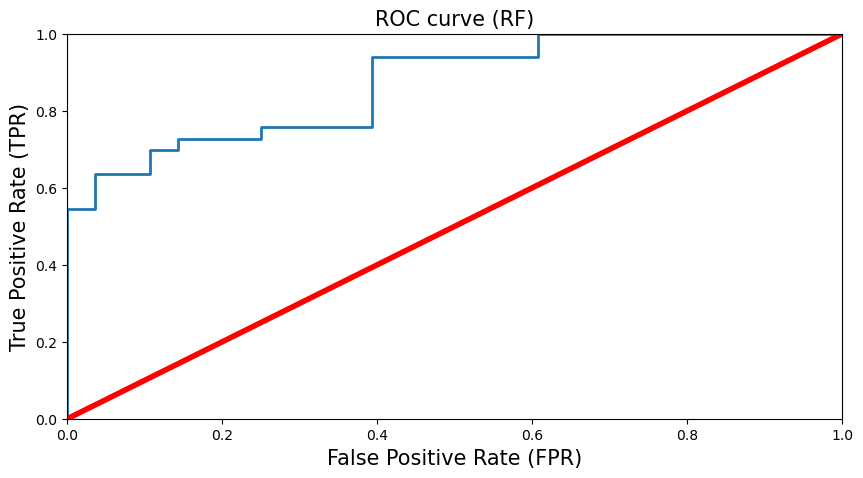

In [366]:
false_positive_rate, true_positive_rate, thresh= roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [367]:
ranking = pd.Series(rf_t.feature_importances_)
ranking.index = X_train.columns
ranking.sort_values(ascending=False)

oldpeak           0.119249
thall_2           0.115983
chol              0.102153
MaxHeartRate      0.100025
thall_3           0.096004
Age               0.082289
RestBloodP        0.071157
slp_1             0.041459
slp_2             0.037686
exng              0.037004
ChestPain_2       0.032653
MajorVessels_2    0.031056
MajorVessels_1    0.028079
Sex               0.025723
RestEcg_1         0.023802
ChestPain_3       0.018201
ChestPain_1       0.016737
MajorVessels_3    0.013084
fbs               0.006491
RestEcg_2         0.001164
dtype: float64

<AxesSubplot:>

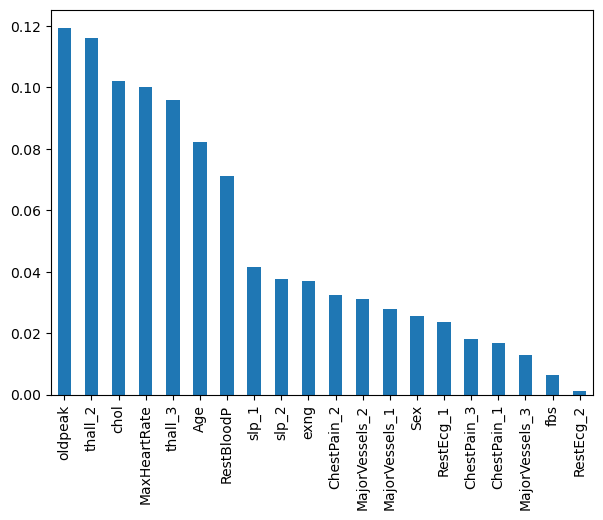

In [368]:
ranking.sort_values(ascending=False).plot.bar(figsize=(7, 5))

## CONCLUSION

Heart attacks are one of the most common causes of death in the world. While exploring this data, a lot of interesting facts about the people at risk rose up and were quiet suprising. We usually relate heart attacks with age, chest pain and sometimes even gender, however, the data showed some interesting discoveries. Thalium stress level and oldpeak proved to be the most influencial criterias to decide if a person is at risk or not; along with other factors like the number of Major Vessels, the cholesterol, Resting Blood Pressure and finally age. 

For this project we explored multiple models to decide on which ones explains our data best. Our expectations were met as XGBoost and Random Forest performed slightly better than the other models even though our dataset is small. As a metric, we chose Recall since it is the best fit for situations like disease detection. After tunning our chosen model, RandomForest Classifier, we were able to slightly improve the recall score. Our model returns a score of 0.85 in recall after performing a cross validation on the testing set. Our classifier also provided a final ranking of the most important features in predicting the target variable, which to certain extent matched our expectations from studying the correlation of our different features.


For the future, I would hope that more data will be availble to train our models better and allow ourselves to make stronger assumptions about the target variable. The more patients we have the more training our model will receive, which will help it predict and perform well on our test set. Also, models like XGBoost are known to outperform other simpler models, however, they need to be fed a lot more data. 
